# PRECIPITACIÓN PROMEDIO AREAL DE CUENCA, PISCO-SENAMHI

In [44]:
# Importar librerias
import fiona, numpy as np
import pylab as pl
from netCDF4 import Dataset
from pyscissor import scissor # pip install pyscissor
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
import pandas as pd
import cartopy.crs as ccrs

ncf = Dataset("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Pp/PISCOpm.nc")
cuenca = fiona.open("D:/T_JONA/TESIS_PISCO/cachi_wg84_R.shp")
print(cuenca.crs)
#cuenca_s18 = cuenca.to_crs(epsg=32718)

# Ajustes generales para los plots..
from matplotlib.font_manager import *
from matplotlib.pylab import *

ioff()

rc(
    'lines',
    linewidth=1)

rc(
    'text',
    usetex=False)# Para poder usar 'usetex=True' es necesario haber instalado latex

rc(
    'font',
    family='Times New Roman')

font_title = FontProperties(size=24)
font_label = FontProperties(size=22)
font_ticks = FontProperties(size=16)
font_legend = FontProperties(size=15)

{'init': 'epsg:4326'}


In [17]:
ncf

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.6.2 (http://code.zmaw.de/projects/cdi)
    Conventions: CF-1.4
    history: Thu Sep 14 16:29:06 2017: cdo mergetime /home/senamhi-cesar/1010prelnR.nc /home/senamhi-cesar/1111prelnR.nc /home/senamhi-cesar/11prelnR.nc /home/senamhi-cesar/1212prelnR.nc /home/senamhi-cesar/1313prelnR.nc /home/senamhi-cesar/1414prelnR.nc /home/senamhi-cesar/1515prelnR.nc /home/senamhi-cesar/1616prelnR.nc /home/senamhi-cesar/1717prelnR.nc /home/senamhi-cesar/1818prelnR.nc /home/senamhi-cesar/1919prelnR.nc /home/senamhi-cesar/2020prelnR.nc /home/senamhi-cesar/2121prelnR.nc /home/senamhi-cesar/2222prelnR.nc /home/senamhi-cesar/22prelnR.nc /home/senamhi-cesar/2323prelnR.nc /home/senamhi-cesar/2424prelnR.nc /home/senamhi-cesar/2525prelnR.nc /home/senamhi-cesar/2626prelnR.nc /home/senamhi-cesar/2727prelnR.nc /home/senamhi-cesar/2828prelnR.nc /home/senamhi-cesar/2929prelnR.nc /

In [18]:
ncf.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float64 longitude(longitude)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (267,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float64 latitude(latitude)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (400,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'z': <class 'netCDF4._netCDF4.Variable'>
 float64 z(z)
     standard_name: time
     long_name: z
     units: months since 1981-01-01 12:00:00
     calendar: proleptic_gregorian
 unlimited dimensions: z
 current shape = (432,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'variable': <class 'netCDF4._netCDF4.Variable'>
 float32 variable(z, latitude, longitude)
     long_name: variable
     _FillValue: -3.4e+38
 

In [19]:
print(ncf.variables['z'])
lats =ncf.variables['latitude'][:]
lons =ncf.variables['longitude'][:] 
prec =ncf.variables['variable'][:]
times =ncf.variables['z'][:]

<class 'netCDF4._netCDF4.Variable'>
float64 z(z)
    standard_name: time
    long_name: z
    units: months since 1981-01-01 12:00:00
    calendar: proleptic_gregorian
unlimited dimensions: z
current shape = (432,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [22]:
# calcular.. mascara para .shp
from shapely.geometry import shape
record = next(iter(cuenca))
shapely_shape = shape(record['geometry'])

pys = scissor(shapely_shape,lats,lons)
wg = pys.get_masked_weight()

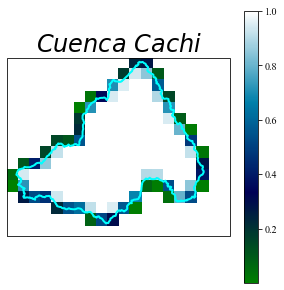

In [41]:
# Cuadricula ponderada
cart_ft = ShapelyFeature([shapely_shape],ccrs.PlateCarree(),facecolor='none',edgecolor='cyan',linewidth=2)

# plot
fig =pl.figure(figsize=(5,5))
ax=pl.axes(projection=ccrs.PlateCarree())
pl.pcolormesh(lons,lats,wg,cmap='ocean',shading='nearest')
pl.colorbar()
ax.set_title("$Cuenca\ Cachi$", fontproperties=font_title)
ax.add_feature(cart_ft)
ax.set_xlim(-74.8, -73.8)
ax.set_ylim(-13.6,-12.8)
pl.show()

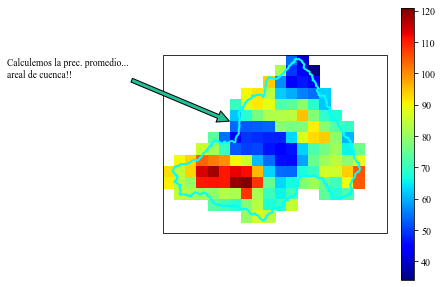

In [32]:
# Asignar mascara
prec.mask=wg.mask

# Plot de precipitación enmascarada del primer paso de tiempo
fig =pl.figure(figsize=(5,5))
ax=pl.axes(projection=ccrs.PlateCarree())
pl.pcolormesh(lons,lats,prec[-1],cmap='jet')
pl.colorbar()
ax.add_feature(cart_ft)
ax.set_xlim(-74.8, -73.8)
ax.set_ylim(-13.6,-12.8)
ax.annotate('Calculemos la prec. promedio...\nareal de cuenca!!',
            xy=(-74.5,-13.1),#xy=(-74.4,-13.45)
            xytext=(-75.5,-12.9),#xytext=(-74.3,-13.35)
            arrowprops={'facecolor':'#23bf97','shrink':0.01},fontsize=9.5)
pl.show()

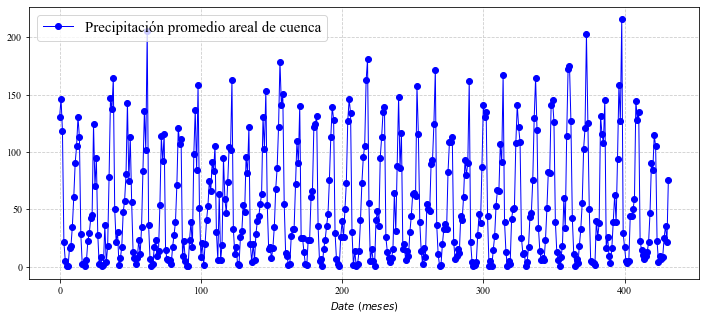

In [45]:
# Serie de precipitación promedio areal de cuenca..
prec_prom = np.zeros(times.shape[0])

for t in range(times.shape[0]):
    prec_prom[t] = np.average(prec[t],weights=wg)

# plot
pl.figure(figsize=(12,5))
pl.plot(times,prec_prom,'o-',label='Precipitación promedio areal de cuenca', color= 'blue')
pl.legend(loc=2, prop=font_legend)
pl.xlabel("$Date\ (meses)$")
pl.grid('on', color='.8',linestyle='--')
pl.show()

In [37]:
# Guardas datos!!!
df= pd.DataFrame(prec_prom)
df
#df.to_csv("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Pp/Python_PISCO/Prec_areal.csv")

,0
0,130.747229
1,146.279216
2,117.791755
3,21.721971
4,5.037578
...,...
427,8.455290
428,25.195058
429,35.799142
430,21.656996


In [ ]:
# Pruebe con la data de temperatura!!!